In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_spec.csv
/kaggle/input/jpx-tokyo-stock-

# Here starts my Baseline

Ideas:

1  - Feature engeneering- Basic and effective;

2 - Gradient Boosting Regressions;

3 - Neuronets Regressions; and

4 - Submission.



## 1 Feature Engeneering

In [2]:

def concat_df(df1, df2):
    df1 = pd.concat([df1, df2],
                    ignore_index=True, sort=False
                    ).drop_duplicates(["RowId"], keep="first")
    return df1

In [3]:
import gc

In [4]:
# For now... use pandas.... 
#If too heavy use Cudf

# For now... just fix the floats
dtypes = {
'SecuritiesCode' :     np.int16,
'Open'           :     np.float16,
'High'           :     np.float16,
'Low'            :     np.float16,
'Close'          :     np.float16,
'Volume'         :       np.int8,
'AdjustmentFactor':    np.float16,
'ExpectedDividend':    np.float16,
'Target'        :      np.float16
}
path = "../input/jpx-tokyo-stock-exchange-prediction/"
df_prices = pd.read_csv(f"{path}train_files/stock_prices.csv",dtype = dtypes)
prices = pd.read_csv(f"{path}supplemental_files/stock_prices.csv",dtype = dtypes)
df_prices = concat_df(df_prices, prices)
prices = pd.read_csv(f"{path}train_files/secondary_stock_prices.csv",dtype = dtypes)
df_prices = concat_df(df_prices, prices)
prices = pd.read_csv(f"{path}supplemental_files/secondary_stock_prices.csv",dtype = dtypes)
df_prices = concat_df(df_prices, prices)
df_prices = df_prices[df_prices.Date>"2021-06-01"]
df_prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986052 entries, 2080531 to 5189767
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   RowId             986052 non-null  object 
 1   Date              986052 non-null  object 
 2   SecuritiesCode    986052 non-null  int16  
 3   Open              967267 non-null  float16
 4   High              967267 non-null  float16
 5   Low               967267 non-null  float16
 6   Close             967267 non-null  float16
 7   Volume            986052 non-null  int8   
 8   AdjustmentFactor  986052 non-null  float16
 9   ExpectedDividend  7931 non-null    float16
 10  SupervisionFlag   986052 non-null  bool   
 11  Target            985864 non-null  float16
dtypes: bool(1), float16(7), int16(1), int8(1), object(2)
memory usage: 39.5+ MB


In [5]:
# def prep_prices(price):
#     price.fillna(0,inplace=True)
#     return price

In [6]:
# df_prices = prep_prices(df_prices)
# pd.options.display.float_format = '{:,.6g}'.format
# df_prices.describe()

In [7]:
# # Open stock_list
# stock_list = pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/stock_list.csv")
# stock_list

In [8]:
# #Match Stocklist to securities code
# stock_list = stock_list[['SecuritiesCode','NewMarketSegment','33SectorCode','17SectorCode','Universe0','Section/Products','NewIndexSeriesSize']]
# stock_list = stock_list.replace(np.nan,'-')
# stock_list['Universe0'] = np.where(stock_list['Universe0'], 1, 0)
# stock_list = stock_list.drop_duplicates()
# stock_list


In [9]:
# from datetime import datetime
# import time

#  # auxiliary function, from datetime to timestamp
# totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple()))

# Data Features


In [10]:

# define function to compute log returns
# def log_return(series, periods=1):
#     return np.log(series).diff(periods=periods)


# # def fill_the_gaps(df):
# #     new_df = pd.DataFrame(columns= df.columns)
# #     for i in range(len(df['SecuritiesCode'].unique())):
# #         new_df = new_df.append(df[df['SecuritiesCode'] == i].reindex(range(df[df['SecuritiesCode'] == i].index[0],df[df['SecuritiesCode'] == i].index[-1]+60,60),method='pad'))
# #     new_df.fillna(method = 'pad', inplace = True) 
# #     return new_df


# def rsiFunc(prices, n=14):
#     deltas = np.diff(prices)
#     seed = deltas[:n+1]
#     up = seed[seed>=0].sum()/n
#     down = -seed[seed<0].sum()/n
#     rs = up/down
#     rsi = np.zeros_like(prices)
#     rsi[:n] = 100. - 100./(1.+rs)

#     for i in range(n, len(prices)):
#         delta = deltas[i-1] # cause the diff is 1 shorter

#         if delta>0:
#             upval = delta
#             downval = 0.
#         else:
#             upval = 0.
#             downval = -delta

#         up = (up*(n-1) + upval)/n
#         down = (down*(n-1) + downval)/n

#         rs = up/down
#         rsi[i] = 100. - 100./(1.+rs)

#     return rsi



def get_features(df):

#     df['log_return_5'] = log_return(df['Close'],periods=5)
#     df['log_return'] = log_return(df['Close'],periods=1)

    upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
    lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

    df['upper_shadow'] = upper_shadow(df)
    df['lower_shadow'] = lower_shadow(df)
    
#     df['EMA_21'] = df['Close'].ewm(span=21).mean()
    
#     df['EMA_55'] = df['Close'].ewm(span=55).mean()
    
#     df['EMA_315'] = df['Close'].ewm(span=315).mean()
    
#     df['EMA_825'] = df['Close'].ewm(span=825).mean()
    
#     window = 7
    
#     no_of_std = 2
    
#     df[f'EMA_{window}'] = df['Close'].ewm(span=window).mean()
    
#     df[f'EMA_{window}_std'] = df['Close'].rolling(window=window).std()
    
#     df[f'EMA_{window}_BB_high'] = df[f'EMA_{window}'] + no_of_std * df[f'EMA_{window}_std']
    
#     df[f'MA_{window}MA_BB_low'] = df[f'EMA_{window}'] - no_of_std * df[f'EMA_{window}_std']
    
#     window = 5
    
#     df[f'EMA_{window}'] = df['Close'].ewm(span=window).mean()
    
#     df[f'EMA_{window}_std'] = df['Close'].rolling(window=window).std()
    
#     df[f'EMA_{window}_BB_high'] = df[f'EMA_{window}'] + no_of_std * df[f'EMA_{window}_std']
    
#     df[f'MA_{window}MA_BB_low'] = df[f'EMA_{window}'] - no_of_std * df[f'EMA_{window}_std']
    
#     df['MACD'] = df['EMA_7'] - df['EMA_5']
    
    
#     df['rsi_5'] = rsiFunc(df['Close'].values, 5)
    
#     df['rsi_7'] = rsiFunc(df['Close'].values, 7)
    
#     df['rsi_21'] = rsiFunc(df['Close'].values, 21)
    
    
    
    df['VWAP'] = (df['Close'] * df['Volume'])/ df['Volume']




    
    
    #df = pd.concat([df, pd.get_dummies(df['Asset_ID'], prefix= 'Asset_')], axis=1)
    
    df[[ 'upper_shadow', 'lower_shadow','VWAP']].astype('float16')
    
    return df



In [11]:
#df_prices = df_prices.sort_values('SecuritiesCode')

df_prices = get_features(df_prices)

df_prices = df_prices.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

df_prices = df_prices.fillna(0)

## Data Preparation



In [12]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow','VWAP']
features = ["SecuritiesCode",'Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow','VWAP']

In [14]:
# # Creating endog and exog variables
# y = df_prices[['Target']]
# X = df_prices[features]

In [15]:
df_prices[scaled_features] = scaler.fit_transform(df_prices[scaled_features])

## Training Model

From Keras tutorial:
https://keras.io/examples/structured_data/structured_data_classification_from_scratch/#preparing-the-data

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
val_dataframe = df_prices.sample(frac=0.2, random_state=1337)
train_dataframe = df_prices.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 788842 samples for training and 197210 for validation


In [18]:
del df_prices
gc.collect()

42

In [19]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

2022-06-23 16:59:01.528500: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
del train_dataframe
del val_dataframe
gc.collect()

21

In [21]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'RowId': <tf.Tensor: shape=(), dtype=string, numpy=b'20220301_3361'>, 'Date': <tf.Tensor: shape=(), dtype=string, numpy=b'2022-03-01'>, 'SecuritiesCode': <tf.Tensor: shape=(), dtype=int16, numpy=3361>, 'Open': <tf.Tensor: shape=(), dtype=float64, numpy=-0.3216128462616617>, 'High': <tf.Tensor: shape=(), dtype=float64, numpy=-0.3241265737245177>, 'Low': <tf.Tensor: shape=(), dtype=float64, numpy=-0.31909637012458275>, 'Close': <tf.Tensor: shape=(), dtype=float64, numpy=-0.32184224384002713>, 'Volume': <tf.Tensor: shape=(), dtype=float64, numpy=-0.034060416445794446>, 'AdjustmentFactor': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'ExpectedDividend': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'SupervisionFlag': <tf.Tensor: shape=(), dtype=bool, numpy=False>, 'upper_shadow': <tf.Tensor: shape=(), dtype=float64, numpy=-0.1406164789798372>, 'lower_shadow': <tf.Tensor: shape=(), dtype=float64, numpy=-0.1585589636857418>, 'VWAP': <tf.Tensor: shape=(), dtype=float64, numpy=0

In [22]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)


In [23]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [24]:
#Categorical Features
SecuritiesCode = keras.Input(shape=(1,), name="SecuritiesCode", dtype="int16")

#Numerical Features
Open = keras.Input(shape=(1,), name="Open",dtype = 'float16')
High = keras.Input(shape=(1,), name="High",dtype = 'float16')
Low = keras.Input(shape=(1,), name="Low",dtype = 'float16')
Close = keras.Input(shape=(1,), name="Close",dtype = 'float16')
Volume = keras.Input(shape=(1,), name="Volume")
# log_return_5 = keras.Input(shape=(1,), name="log_return_5",dtype = 'float16')
# log_return = keras.Input(shape=(1,), name="log_return",dtype = 'float16')
upper_shadow = keras.Input(shape=(1,), name="upper_shadow",dtype = 'float16')
lower_shadow = keras.Input(shape=(1,), name="lower_shadow",dtype = 'float16')
VWAP = keras.Input(shape=(1,), name="VWAP",dtype = 'float16')
# EMA_7 = keras.Input(shape=(1,), name="EMA_7",dtype = 'float16')
# EMA_7_std = keras.Input(shape=(1,), name="EMA_7_std",dtype = 'float16')
# # EMA_7_BB_high = keras.Input(shape=(1,), name="EMA_7_BB_high",dtype = 'float16')
# #MA_7MA_BB_low = keras.Input(shape=(1,), name="MA_7MA_BB_low")
# EMA_5 = keras.Input(shape=(1,), name="EMA_5",dtype = 'float16')
# EMA_5_std = keras.Input(shape=(1,), name="EMA_5_std",dtype = 'float16')
# # EMA_5_BB_high = keras.Input(shape=(1,), name="EMA_5_BB_high",dtype = 'float16')
# # MA_5MA_BB_low = keras.Input(shape=(1,), name="MA_5MA_BB_low",dtype = 'float16')
# MACD = keras.Input(shape=(1,), name="MACD",dtype = 'float16')
# rsi_5 = keras.Input(shape=(1,), name="rsi_5",dtype = 'float16')
# rsi_7 = keras.Input(shape=(1,), name="rsi_7",dtype = 'float16')
# rsi_21 = keras.Input(shape=(1,), name="rsi_21",dtype = 'float16')

#imputs

# all_inputs = [SecuritiesCode,Open, High, Low, Close, Volume, log_return_5, log_return, upper_shadow, lower_shadow,
#        VWAP, EMA_7, EMA_7_std,EMA_7_BB_high, MA_7MA_BB_low, EMA_5, EMA_5_std, EMA_5_BB_high,
#        MA_5MA_BB_low, MACD, rsi_5, rsi_7, rsi_21]

all_inputs = [SecuritiesCode,Open, High, Low, Close, Volume, upper_shadow, lower_shadow,
       VWAP]

In [25]:


#Encode Numerical 
Open_encoded = encode_numerical_feature(Open, "Open", train_ds)
High_encoded = encode_numerical_feature(High, "High", train_ds)
Low_encoded = encode_numerical_feature(Low, "Low", train_ds)
Close_encoded = encode_numerical_feature(Close, "Close", train_ds)
Volume_encoded = encode_numerical_feature(Volume, "Volume", train_ds)
# log_return_5_encoded = encode_numerical_feature(log_return_5, "log_return_5", train_ds)
# log_return_encoded = encode_numerical_feature(log_return, "log_return", train_ds)
upper_shadow_encoded = encode_numerical_feature(upper_shadow, "upper_shadow", train_ds)
lower_shadow_encoded = encode_numerical_feature(lower_shadow, "lower_shadow", train_ds)
VWAP_encoded = encode_numerical_feature(VWAP, "VWAP", train_ds)
# EMA_7_encoded = encode_numerical_feature(EMA_7, "EMA_7", train_ds)
# EMA_7_std_encoded = encode_numerical_feature(EMA_7_std, "EMA_7_std", train_ds)
# # EMA_7_BB_high_encoded = encode_numerical_feature(EMA_7_BB_high, "EMA_7_BB_high", train_ds)
# # MA_7MA_BB_low_encoded = encode_numerical_feature(MA_7MA_BB_low, "MA_7MA_BB_low", train_ds)
# EMA_5_encoded = encode_numerical_feature(EMA_5, "EMA_5", train_ds)
# EMA_5_std_encoded = encode_numerical_feature(EMA_5_std, "EMA_5_std", train_ds)
# # EMA_5_BB_high_encoded = encode_numerical_feature(EMA_5_BB_high, "EMA_5_BB_high", train_ds)
# # MA_5MA_BB_low_encoded = encode_numerical_feature(MA_5MA_BB_low, "MA_5MA_BB_low", train_ds)
# MACD_encoded = encode_numerical_feature(MACD, "MACD", train_ds)
# rsi_5_encoded = encode_numerical_feature(rsi_5, "rsi_5", train_ds)
# rsi_7_encoded = encode_numerical_feature(rsi_7, "rsi_7", train_ds)
# rsi_21_encoded = encode_numerical_feature(rsi_21, "rsi_21", train_ds)


2022-06-23 16:59:13.205099: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [26]:
# Encode Categorical
SecuritiesCode_encoded = encode_categorical_feature(SecuritiesCode, "SecuritiesCode", train_ds, False)

In [27]:
all_features = layers.concatenate(
    [SecuritiesCode_encoded,Open_encoded, High_encoded, Low_encoded, Close_encoded, Volume_encoded, upper_shadow_encoded, lower_shadow_encoded,
       VWAP_encoded ])


In [28]:
%%time

x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

CPU times: user 42.2 ms, sys: 4.99 ms, total: 47.2 ms
Wall time: 51.1 ms


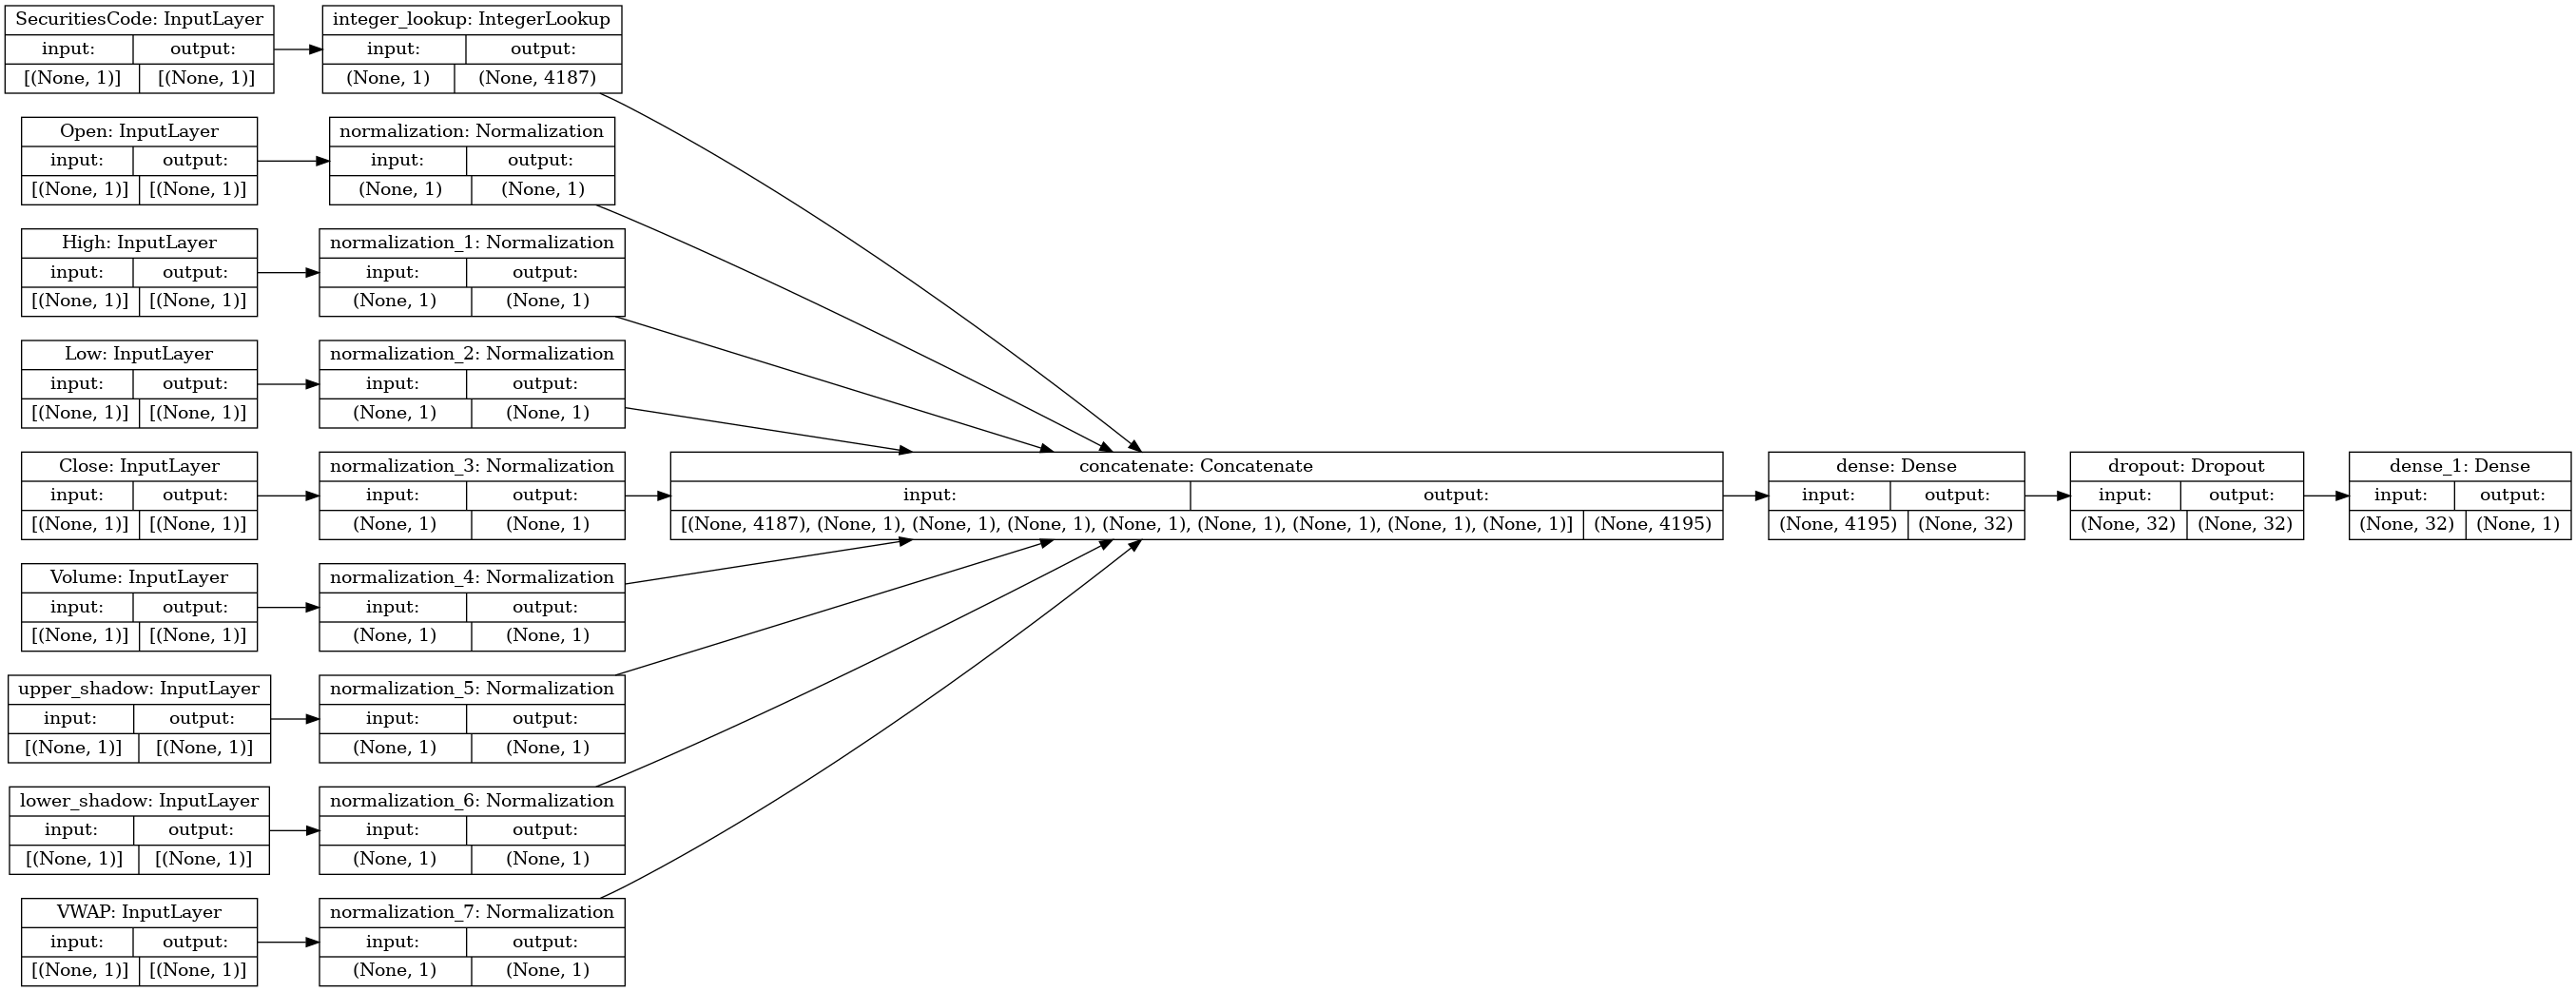

In [29]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [30]:
# Set early_stopping callbacks, if val_loss does not improve for 10 epochs, stop training and restore best model weights
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-3,
    restore_best_weights=True,
)

In [31]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['RowId', 'Date', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


24652/24652 [==============================] - 121s 5ms/step - loss: -0.0036 - accuracy: 0.0735 - val_loss: -0.0145 - val_accuracy: 0.0745
Epoch 2/50


2022-06-23 17:06:06.953817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 547421 of 788842


   38/24652 [..............................] - ETA: 1:43 - loss: -0.0089 - accuracy: 0.0798

2022-06-23 17:06:10.240854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 138s 5ms/step - loss: -0.0442 - accuracy: 0.0735 - val_loss: -0.0430 - val_accuracy: 0.0745
Epoch 3/50
24652/24652 [==============================] - 122s 5ms/step - loss: -0.1169 - accuracy: 0.0735 - val_loss: -0.0877 - val_accuracy: 0.0745
Epoch 4/50
24652/24652 [==============================] - 111s 4ms/step - loss: -0.2268 - accuracy: 0.0735 - val_loss: -0.1504 - val_accuracy: 0.0745
Epoch 5/50


2022-06-23 17:13:12.613190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 637937 of 788842


   42/24652 [..............................] - ETA: 1:32 - loss: -0.5407 - accuracy: 0.0662

2022-06-23 17:13:14.573876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 120s 4ms/step - loss: -0.3665 - accuracy: 0.0735 - val_loss: -0.2305 - val_accuracy: 0.0745
Epoch 6/50


2022-06-23 17:15:34.519817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 390941 of 788842


    1/24652 [..............................] - ETA: 92:01:03 - loss: 0.9562 - accuracy: 0.1250

2022-06-23 17:15:37.952613: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 126s 5ms/step - loss: -0.5383 - accuracy: 0.0735 - val_loss: -0.3270 - val_accuracy: 0.0745
Epoch 7/50
24652/24652 [==============================] - 110s 4ms/step - loss: -0.7672 - accuracy: 0.0735 - val_loss: -0.4467 - val_accuracy: 0.0745
Epoch 8/50
24652/24652 [==============================] - 102s 4ms/step - loss: -0.9826 - accuracy: 0.0735 - val_loss: -0.5806 - val_accuracy: 0.0745
Epoch 9/50
24652/24652 [==============================] - 120s 4ms/step - loss: -1.2948 - accuracy: 0.0735 - val_loss: -0.7360 - val_accuracy: 0.0745
Epoch 10/50
24652/24652 [==============================] - 100s 4ms/step - loss: -1.6576 - accuracy: 0.0735 - val_loss: -0.9075 - val_accuracy: 0.0745
Epoch 11/50
24652/24652 [==============================] - 123s 5ms/step - loss: -1.9895 - accuracy: 0.0735 - val_loss: -1.0971 - val_accuracy: 0.0745
Epoch 12/50


2022-06-23 17:28:46.707895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 547551 of 788842


   46/24652 [..............................] - ETA: 1:25 - loss: -1.5518 - accuracy: 0.0727

2022-06-23 17:28:50.539577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 119s 4ms/step - loss: -2.3238 - accuracy: 0.0735 - val_loss: -1.2990 - val_accuracy: 0.0745
Epoch 13/50
24652/24652 [==============================] - 104s 4ms/step - loss: -2.8219 - accuracy: 0.0735 - val_loss: -1.5174 - val_accuracy: 0.0745
Epoch 14/50
24652/24652 [==============================] - 106s 4ms/step - loss: -3.2935 - accuracy: 0.0735 - val_loss: -1.7689 - val_accuracy: 0.0745
Epoch 15/50


2022-06-23 17:34:39.023340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 635020 of 788842


   51/24652 [..............................] - ETA: 1:15 - loss: -0.7152 - accuracy: 0.0717

2022-06-23 17:34:42.363071: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 108s 4ms/step - loss: -3.5955 - accuracy: 0.0735 - val_loss: -2.0235 - val_accuracy: 0.0745
Epoch 16/50
    1/24652 [..............................] - ETA: 69:32:49 - loss: 30.4809 - accuracy: 0.0312

2022-06-23 17:37:00.929781: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 765694 of 788842
2022-06-23 17:37:01.080638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 112s 4ms/step - loss: -4.1751 - accuracy: 0.0735 - val_loss: -2.3020 - val_accuracy: 0.0745
Epoch 17/50


2022-06-23 17:39:22.835401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 219013 of 788842


   46/24652 [..............................] - ETA: 1:24 - loss: -11.5571 - accuracy: 0.0639

2022-06-23 17:39:27.458547: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 110s 4ms/step - loss: -4.9899 - accuracy: 0.0735 - val_loss: -2.6157 - val_accuracy: 0.0745
Epoch 18/50


2022-06-23 17:41:12.822528: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 220637 of 788842


   53/24652 [..............................] - ETA: 1:11 - loss: -3.6167 - accuracy: 0.0631

2022-06-23 17:41:17.397378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 117s 4ms/step - loss: -5.5694 - accuracy: 0.0735 - val_loss: -2.9330 - val_accuracy: 0.0745
Epoch 19/50
24652/24652 [==============================] - 101s 4ms/step - loss: -6.2615 - accuracy: 0.0735 - val_loss: -3.2843 - val_accuracy: 0.0745
Epoch 20/50


2022-06-23 17:45:15.633467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 731554 of 788842


    1/24652 [..............................] - ETA: 71:06:08 - loss: -32.4126 - accuracy: 0.1562

2022-06-23 17:45:16.011826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 110s 4ms/step - loss: -6.7472 - accuracy: 0.0735 - val_loss: -3.6252 - val_accuracy: 0.0745
Epoch 21/50
24652/24652 [==============================] - 106s 4ms/step - loss: -7.5995 - accuracy: 0.0735 - val_loss: -4.0113 - val_accuracy: 0.0745
Epoch 22/50
24652/24652 [==============================] - 108s 4ms/step - loss: -8.1376 - accuracy: 0.0735 - val_loss: -4.3906 - val_accuracy: 0.0745
Epoch 23/50


2022-06-23 17:51:47.203066: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 283410 of 788842


   53/24652 [..............................] - ETA: 1:12 - loss: -4.9139 - accuracy: 0.0737 

2022-06-23 17:51:50.759685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 109s 4ms/step - loss: -9.2521 - accuracy: 0.0735 - val_loss: -4.8052 - val_accuracy: 0.0745
Epoch 24/50


2022-06-23 17:54:09.108776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 195545 of 788842


   50/24652 [..............................] - ETA: 1:18 - loss: 16.1461 - accuracy: 0.0712

2022-06-23 17:54:13.836783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 136s 5ms/step - loss: -10.0929 - accuracy: 0.0735 - val_loss: -5.2367 - val_accuracy: 0.0745
Epoch 25/50
24652/24652 [==============================] - 108s 4ms/step - loss: -10.8583 - accuracy: 0.0735 - val_loss: -5.6902 - val_accuracy: 0.0745
Epoch 26/50
24652/24652 [==============================] - 106s 4ms/step - loss: -11.8259 - accuracy: 0.0735 - val_loss: -6.1633 - val_accuracy: 0.0745
Epoch 27/50
24652/24652 [==============================] - 103s 4ms/step - loss: -12.4314 - accuracy: 0.0735 - val_loss: -6.6385 - val_accuracy: 0.0745
Epoch 28/50


2022-06-23 18:02:56.767175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 460757 of 788842


   41/24652 [..............................] - ETA: 1:34 - loss: -26.0010 - accuracy: 0.0640

2022-06-23 18:02:59.766246: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 114s 4ms/step - loss: -13.8780 - accuracy: 0.0735 - val_loss: -7.1337 - val_accuracy: 0.0745
Epoch 29/50


2022-06-23 18:05:20.353426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 179186 of 788842


   45/24652 [..............................] - ETA: 1:26 - loss: -33.0509 - accuracy: 0.0625

2022-06-23 18:05:27.401518: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 116s 4ms/step - loss: -14.3909 - accuracy: 0.0734 - val_loss: -7.6784 - val_accuracy: 0.0745
Epoch 30/50


2022-06-23 18:07:42.984000: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 169490 of 788842


   43/24652 [..............................] - ETA: 1:31 - loss: -1.6991 - accuracy: 0.0669 

2022-06-23 18:07:49.853807: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 130s 4ms/step - loss: -15.6047 - accuracy: 0.0735 - val_loss: -8.2060 - val_accuracy: 0.0745
Epoch 31/50
24652/24652 [==============================] - 106s 4ms/step - loss: -16.9986 - accuracy: 0.0735 - val_loss: -8.7647 - val_accuracy: 0.0745
Epoch 32/50


2022-06-23 18:12:24.397641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 735129 of 788842


   55/24652 [..............................] - ETA: 1:11 - loss: -6.4291 - accuracy: 0.0705 

2022-06-23 18:12:24.763276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 118s 4ms/step - loss: -17.8720 - accuracy: 0.0735 - val_loss: -9.3215 - val_accuracy: 0.0745
Epoch 33/50
24652/24652 [==============================] - 111s 4ms/step - loss: -19.3519 - accuracy: 0.0735 - val_loss: -9.9475 - val_accuracy: 0.0745
Epoch 34/50
24652/24652 [==============================] - 110s 4ms/step - loss: -20.4843 - accuracy: 0.0735 - val_loss: -10.5423 - val_accuracy: 0.0745
Epoch 35/50


2022-06-23 18:18:26.947238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 460656 of 788842


   44/24652 [..............................] - ETA: 1:29 - loss: -27.5228 - accuracy: 0.0710

2022-06-23 18:18:29.631506: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 117s 4ms/step - loss: -21.4778 - accuracy: 0.0735 - val_loss: -11.1786 - val_accuracy: 0.0745
Epoch 36/50


2022-06-23 18:20:48.853494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 163959 of 788842


   44/24652 [..............................] - ETA: 1:28 - loss: -2.5455 - accuracy: 0.0810

2022-06-23 18:20:53.913622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 134s 5ms/step - loss: -23.4970 - accuracy: 0.0735 - val_loss: -11.8319 - val_accuracy: 0.0745
Epoch 37/50
24652/24652 [==============================] - 108s 4ms/step - loss: -24.2395 - accuracy: 0.0735 - val_loss: -12.4845 - val_accuracy: 0.0745
Epoch 38/50
24652/24652 [==============================] - 116s 4ms/step - loss: -25.3399 - accuracy: 0.0735 - val_loss: -13.2002 - val_accuracy: 0.0745
Epoch 39/50
24652/24652 [==============================] - 112s 4ms/step - loss: -26.7986 - accuracy: 0.0735 - val_loss: -13.8985 - val_accuracy: 0.0745
Epoch 40/50


2022-06-23 18:29:12.944658: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 730261 of 788842


   34/24652 [..............................] - ETA: 1:58 - loss: -24.5542 - accuracy: 0.0781

2022-06-23 18:29:13.356450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 120s 4ms/step - loss: -28.4072 - accuracy: 0.0734 - val_loss: -14.6398 - val_accuracy: 0.0745
Epoch 41/50


2022-06-23 18:31:34.851384: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 182310 of 788842


   40/24652 [..............................] - ETA: 1:40 - loss: -89.2583 - accuracy: 0.0719

2022-06-23 18:31:39.773923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 126s 5ms/step - loss: -30.1106 - accuracy: 0.0735 - val_loss: -15.3808 - val_accuracy: 0.0745
Epoch 42/50


2022-06-23 18:33:56.758449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 161077 of 788842


   40/24652 [..............................] - ETA: 1:39 - loss: 55.6531 - accuracy: 0.0594

2022-06-23 18:34:02.606617: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 133s 5ms/step - loss: -30.8051 - accuracy: 0.0735 - val_loss: -16.1464 - val_accuracy: 0.0745
Epoch 43/50
24652/24652 [==============================] - 116s 4ms/step - loss: -31.7262 - accuracy: 0.0735 - val_loss: -16.8978 - val_accuracy: 0.0745
Epoch 44/50


2022-06-23 18:38:31.387817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 588862 of 788842


   32/24652 [..............................] - ETA: 2:09 - loss: 56.2304 - accuracy: 0.0801

2022-06-23 18:38:32.838405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 122s 4ms/step - loss: -33.6143 - accuracy: 0.0735 - val_loss: -17.6829 - val_accuracy: 0.0745
Epoch 45/50


2022-06-23 18:40:33.323319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 537846 of 788842


   44/24652 [..............................] - ETA: 1:26 - loss: 43.6406 - accuracy: 0.0703 

2022-06-23 18:40:36.795853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 123s 4ms/step - loss: -36.4758 - accuracy: 0.0735 - val_loss: -18.4788 - val_accuracy: 0.0745
Epoch 46/50
   28/24652 [..............................] - ETA: 1:32 - loss: -75.6628 - accuracy: 0.0770

2022-06-23 18:42:35.889116: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 776840 of 788842
2022-06-23 18:42:35.967182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 120s 4ms/step - loss: -38.2954 - accuracy: 0.0735 - val_loss: -19.3581 - val_accuracy: 0.0745
Epoch 47/50


2022-06-23 18:44:36.253397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 232016 of 788842


   45/24652 [..............................] - ETA: 1:27 - loss: -57.3777 - accuracy: 0.0819

2022-06-23 18:44:40.817647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 123s 4ms/step - loss: -39.8725 - accuracy: 0.0735 - val_loss: -20.2116 - val_accuracy: 0.0745
Epoch 48/50
24652/24652 [==============================] - 115s 4ms/step - loss: -42.2531 - accuracy: 0.0735 - val_loss: -21.1365 - val_accuracy: 0.0745
Epoch 49/50
    1/24652 [..............................] - ETA: 69:50:23 - loss: 218.6511 - accuracy: 0.1562

2022-06-23 18:48:53.029061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 759150 of 788842
2022-06-23 18:48:53.223670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 118s 4ms/step - loss: -43.4258 - accuracy: 0.0735 - val_loss: -22.0131 - val_accuracy: 0.0745
Epoch 50/50


2022-06-23 18:51:14.935381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 216671 of 788842


   44/24652 [..............................] - ETA: 1:29 - loss: -71.1671 - accuracy: 0.0696 

2022-06-23 18:51:19.345326: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


24652/24652 [==============================] - 119s 4ms/step - loss: -44.6121 - accuracy: 0.0735 - val_loss: -22.9169 - val_accuracy: 0.0745


In [32]:
# Save model
model.save("dnn_1.tf")

2022-06-23 18:53:36.938650: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


# Submission


In [33]:
# import jpx_tokyo_market_prediction


# # Make predictions and submission
# env = jpx_tokyo_market_prediction.make_env()   # initialize the environment
# iter_test = env.iter_test()    # an iterator which loops over the test files
# for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:
#     prices = prices.sort_values('SecuritiesCode')
#     prices = get_features(prices)
#     prices = prices.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#     prices = prices.fillna(0)
#     test_ds = dataframe_to_dataset_test(prices)
#     sample_prediction['target_pred'] = best_model.predict(test_ds)
#     sample_prediction = sample_prediction.sort_values(by="target_pred", ascending=False)
#     sample_prediction['Rank'] = np.arange(2000)
#     sample_prediction = sample_prediction.sort_values(by="SecuritiesCode", ascending=True)
#     sample_prediction.drop(['target_pred'], axis=1, inplace=True)
#     display(sample_prediction)
#     env.predict(sample_prediction)   # register your predictions